In [182]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
from keras.preprocessing.sequence import pad_sequences
import json

with open('output_data_rnn.json', 'r') as f:
    data = json.load(f)

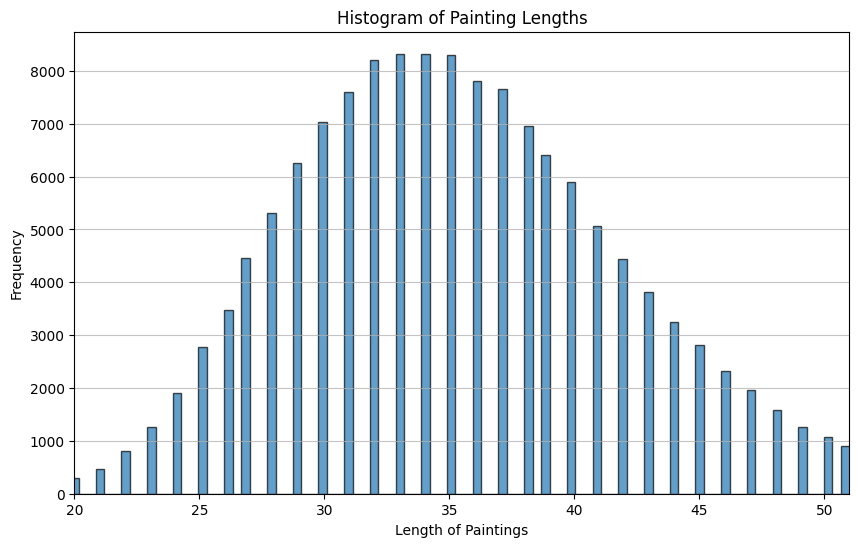

In [183]:
painting_lengths = [len(painting) for painting in data]

plt.figure(figsize=(10, 6))
plt.hist(painting_lengths, bins='auto', alpha=0.7, edgecolor='black')
plt.title('Histogram of Painting Lengths')
plt.xlabel('Length of Paintings')
plt.ylabel('Frequency')
plt.xlim(20, 51)
plt.grid(axis='y', alpha=0.75)
plt.show()

In [184]:
data_selected = [painting for painting in data if len(painting) == 35]

In [185]:
data_selected = np.array(data_selected)
data_selected.shape

(8303, 35, 2)

There are 8326 paintings of apples containg 34 pairs of coordinates

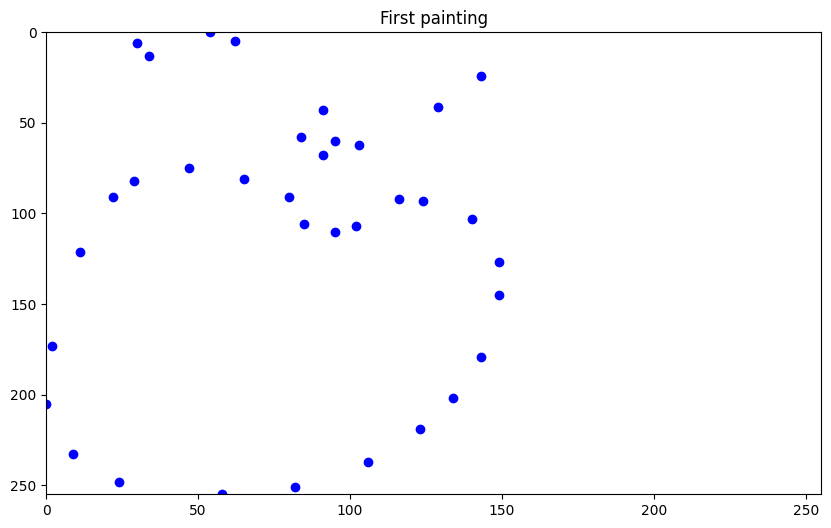

In [186]:
# scatter plot first data_selected
plt.figure(figsize=(10, 6))
plt.scatter(data_selected[0, :, 0], data_selected[0, :, 1], c='blue', label='First Painting')
plt.title('First painting')
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.show()

In [187]:
inputs = []
targets = []

for painting in data_selected:
    max_initial_length = min(len(painting), 34)  
    for initial_length in range(4, max_initial_length + 1): 
        input_sequence = painting[:initial_length]  
        target_sequence = painting[initial_length]  
        inputs.append(input_sequence)
        targets.append(target_sequence)

inputs = pad_sequences(inputs, padding='post', dtype='float32')
inputs = np.array(inputs)
targets = np.array(targets)

Text(0.5, 1.0, 'First painting')

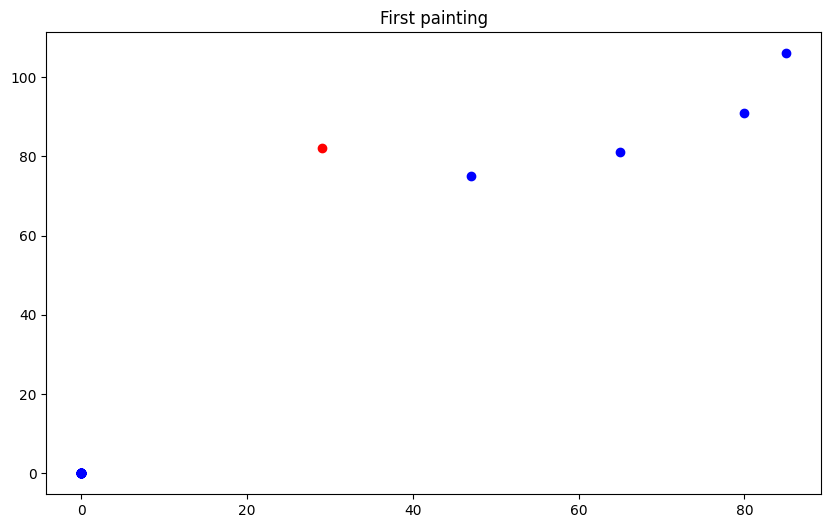

In [188]:
plt.figure(figsize=(10, 6))
plt.scatter(inputs[0, :, 0], inputs[0, :, 1], c='blue', label='First Painting')
plt.scatter(targets[0, 0], targets[0, 1], c='red', label='Target')
plt.title('First painting')

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Masking, Dropout


model = Sequential()
model.add(Masking(mask_value=0.0, input_shape=(inputs.shape[1], inputs.shape[2])))  
model.add(LSTM(256, return_sequences=False))  
model.add(Dense(2))  

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

model.summary()

history = model.fit(inputs, targets, epochs=5, batch_size=16, validation_split=0.2)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ masking_20 (Masking)            │ (None, 34, 2)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_29 (LSTM)                  │ (None, 128)            │        67,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,458 (294.76 KB)

 Trainable params: 75,458 (294.76 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
12870/12870 ━━━━━━━━━━━━━━━━━━━━ 337s 26ms/step - loss: 1615.0167 - mae: 25.7797 - val_loss: 371.8269 - val_mae: 12.4361
Epoch 2/5
12870/12870 ━━━━━━━━━━━━━━━━━━━━ 341s 26ms/step - loss: 593.4048 - mae: 17.3921 - val_loss: 370.1345 - val_mae: 12.5099
Epoch 3/5
12870/12870 ━━━━━━━━━━━━━━━━━━━━ 430s 33ms/step - loss: 509.2521 - mae: 15.8718 - val_loss: 362.5812 - val_mae: 12.2819
Epoch 4/5
12870/12870 ━━━━━━━━━━━━━━━━━━━━ 338s 26ms/step - loss: 466.1148 - mae: 14.9977 - val_loss: 356.6000 - val_mae: 12.3287
Epoch 5/5
12870/12870 ━━━━━━━━━━━━━━━━━━━━ 337s 26ms/step - loss: 442.8601 - mae: 14.4032 - val_loss: 345.0196 - val_mae: 11.8378


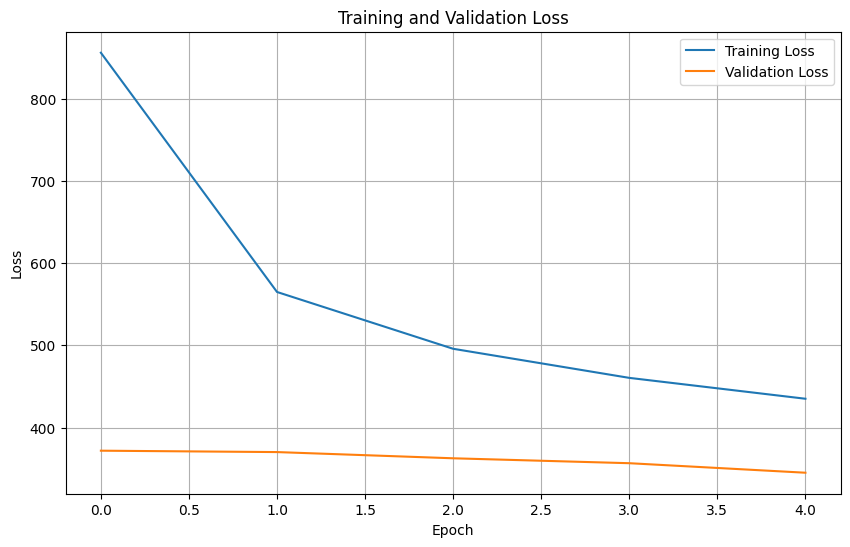

In [191]:
# plot loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━

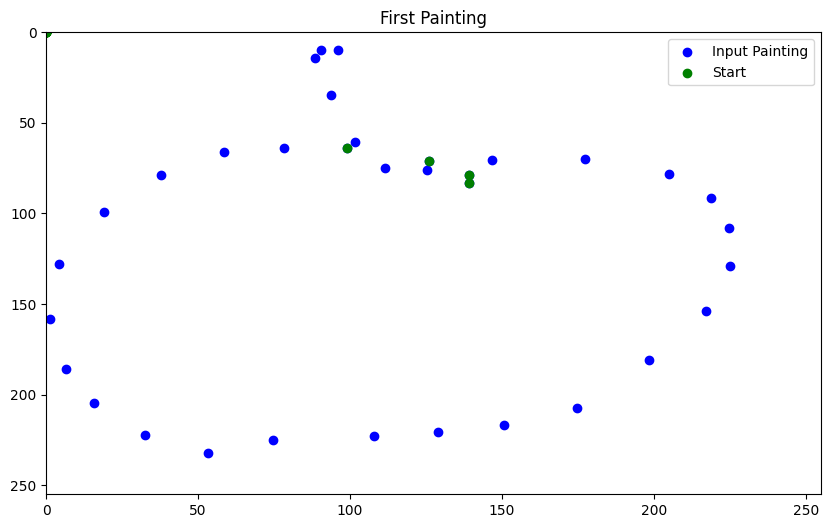

In [192]:
fabricated_inputs = inputs.copy()
id = 35*5 + 11

for i in range(30):
    prediction = model.predict(fabricated_inputs[id].reshape(1, fabricated_inputs.shape[1], fabricated_inputs.shape[2]))
    fabricated_inputs[id][i+4] = [x for x in prediction[0]]

plt.figure(figsize=(10, 6))
plt.scatter(fabricated_inputs[id, :, 0], fabricated_inputs[id, :, 1], c='blue', label='Input Painting')
plt.scatter(inputs[id, :, 0], inputs[id, :, 1], c='green', label='Start')
plt.title('First Painting')
plt.legend()
plt.xlim(0, 255)
plt.ylim(0, 255)
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# save model to ../models/
save = False
if save == True:
    model.save('../models/lstm_model2.h5')